# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [83]:
import pandas as pd
import numpy as np
import datetime

# read in data
bicycle_data_2021 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2021-gent.csv", sep = ";")
bicycle_data_2022 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2022-gent.csv", sep = ";")
bicycle_data_2023 = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
bicycle_data = pd.concat([bicycle_data_2021, bicycle_data_2022, bicycle_data_2023])
bicycle_data["Date_hour"] = bicycle_data['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data = bicycle_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
print(bicycle_data.shape)
print(min(bicycle_data["Date_hour"]))
print(max(bicycle_data["Date_hour"]))
bicycle_data.head()

(21189, 3)
2021-03-01T00
2023-07-31T23


,Datum,Date_hour,Totaal
0,2021-03-01,2021-03-01T00,5.0
1,2021-03-01,2021-03-01T01,1.0
2,2021-03-01,2021-03-01T02,0.0
3,2021-03-01,2021-03-01T03,2.0
4,2021-03-01,2021-03-01T04,21.0


In [84]:
train_rawdata = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
print(train_rawdata.shape)
print(min(train_rawdata["Date_hour"]))
print(max(train_rawdata["Date_hour"]))
train_rawdata.head()

(4343, 2)
2023-01-01T00
2023-06-30T23


,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [85]:
test_rawdata = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
print(test_rawdata.shape)
print(min(test_rawdata["Date_hour"]))
print(max(test_rawdata["Date_hour"]))
test_rawdata.head()

(744, 2)
2023-07-01T00
2023-07-31T23


,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [86]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2).dropna()
print(weather_rawdata.shape)
print(weather_rawdata.isna().sum())
weather_rawdata.head()

(24264, 42)
time                                       0
temperature_2m (°C)                        0
relativehumidity_2m (%)                    0
dewpoint_2m (°C)                           0
apparent_temperature (°C)                  0
precipitation (mm)                         0
rain (mm)                                  0
snowfall (cm)                              0
snow_depth (m)                             0
weathercode (wmo code)                     0
pressure_msl (hPa)                         0
surface_pressure (hPa)                     0
cloudcover (%)                             0
cloudcover_low (%)                         0
cloudcover_mid (%)                         0
cloudcover_high (%)                        0
et0_fao_evapotranspiration (mm)            0
vapor_pressure_deficit (kPa)               0
windspeed_10m (km/h)                       0
windspeed_100m (km/h)                      0
winddirection_10m (°)                      0
winddirection_100m (°)                     

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),weathercode (wmo code),...,shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),shortwave_radiation_instant (W/m²),direct_radiation_instant (W/m²),diffuse_radiation_instant (W/m²),direct_normal_irradiance_instant (W/m²),terrestrial_radiation_instant (W/m²)
0,2021-01-01T00:00,0.1,97.0,-0.3,-2.7,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-01T01:00,0.1,97.0,-0.3,-2.8,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-01T02:00,-0.8,98.0,-1.0,-3.9,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-01T03:00,-1.1,97.0,-1.4,-4.4,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-01T04:00,-1.0,97.0,-1.4,-4.3,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")
school_holidays_data.head()

,name,start,end
0,Christmas holiday 2020,2020-12-21,2021-01-03
1,Spring break 2021,2021-02-15,2021-02-21
2,Easter holiday 2021,2021-04-05,2021-04-18
3,Summer holiday 2021,2021-07-01,2021-08-31
4,Autumn break 2021,2021-11-01,2021-11-07


In [88]:
import holidays
belgian_holidays = holidays.Belgium(years=[2021, 2022, 2023])
print(belgian_holidays)

{datetime.date(2021, 1, 1): 'Nieuwjaar', datetime.date(2021, 4, 4): 'Pasen', datetime.date(2021, 4, 5): 'Paasmaandag', datetime.date(2021, 5, 1): 'Dag van de Arbeid', datetime.date(2021, 5, 13): 'O. L. H. Hemelvaart', datetime.date(2021, 5, 23): 'Pinksteren', datetime.date(2021, 5, 24): 'Pinkstermaandag', datetime.date(2021, 7, 21): 'Nationale feestdag', datetime.date(2021, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2021, 11, 1): 'Allerheiligen', datetime.date(2021, 11, 11): 'Wapenstilstand', datetime.date(2021, 12, 25): 'Kerstmis', datetime.date(2022, 1, 1): 'Nieuwjaar', datetime.date(2022, 4, 17): 'Pasen', datetime.date(2022, 4, 18): 'Paasmaandag', datetime.date(2022, 5, 1): 'Dag van de Arbeid', datetime.date(2022, 5, 26): 'O. L. H. Hemelvaart', datetime.date(2022, 6, 5): 'Pinksteren', datetime.date(2022, 6, 6): 'Pinkstermaandag', datetime.date(2022, 7, 21): 'Nationale feestdag', datetime.date(2022, 8, 15): 'O. L. V. Hemelvaart', datetime.date(2022, 11, 1): 'Allerheiligen', datetim

In [89]:
import datetime
school_holidays = {}
for index, row in school_holidays_data.iterrows():
    school_holidays[row['name']] = [datetime.datetime.strptime(row['start'], '%Y-%m-%d'), datetime.datetime.strptime(row['end'], '%Y-%m-%d')]
print(school_holidays)

{'Christmas holiday 2020': [datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2021, 1, 3, 0, 0)], 'Spring break 2021': [datetime.datetime(2021, 2, 15, 0, 0), datetime.datetime(2021, 2, 21, 0, 0)], 'Easter holiday 2021': [datetime.datetime(2021, 4, 5, 0, 0), datetime.datetime(2021, 4, 18, 0, 0)], 'Summer holiday 2021': [datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 8, 31, 0, 0)], 'Autumn break 2021': [datetime.datetime(2021, 11, 1, 0, 0), datetime.datetime(2021, 11, 7, 0, 0)], 'Christmas holiday 2021': [datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2022, 1, 9, 0, 0)], 'Spring break 2022': [datetime.datetime(2022, 2, 28, 0, 0), datetime.datetime(2022, 3, 6, 0, 0)], 'Easter holiday 2022': [datetime.datetime(2022, 4, 4, 0, 0), datetime.datetime(2022, 4, 18, 0, 0)], 'Summer holiday 2022': [datetime.datetime(2022, 7, 1, 0, 0), datetime.datetime(2022, 8, 31, 0, 0)], 'Autumn break 2022': [datetime.datetime(2022, 10, 31, 0, 0), datetime.datetime(2022, 11, 6, 0, 

The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [90]:
from datetime import timedelta

weather_data = weather_rawdata.copy()
weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
weather_data = weather_data[(min(bicycle_data["Date_hour"]) <= weather_data['Date_hour']) & (weather_data['Date_hour'] <= max(test_rawdata["Date_hour"]))]
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data["date"] = date_time.dt.date

print(weather_data.shape)
print(min(weather_data["Date_hour"]))
print(max(weather_data["Date_hour"]))
weather_data.head()

(21192, 43)
2021-03-01T00
2023-07-31T23


,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,pressure_msl,...,diffuse_radiation,direct_normal_irradiance,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant,Date_hour,date
1416,4.0,95.0,3.2,0.9,0.0,0.0,0.0,0.0,0.0,1033.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-01T00,2021-03-01
1417,3.6,96.0,2.9,0.5,0.0,0.0,0.0,0.0,0.0,1033.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-01T01,2021-03-01
1418,3.2,96.0,2.7,0.1,0.0,0.0,0.0,0.0,0.0,1033.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-01T02,2021-03-01
1419,2.9,97.0,2.4,-0.4,0.0,0.0,0.0,0.0,0.0,1033.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-01T03,2021-03-01
1420,2.6,97.0,2.2,-0.8,0.0,0.0,0.0,0.0,0.0,1033.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-01T04,2021-03-01


### Feature engineering

In [91]:
feature_data = weather_data.copy()
feature_data['weekday'] = date_time.dt.strftime('%A')
feature_data['hour'] = date_time.dt.hour
feature_data["month"] = date_time.dt.month
feature_data['hour_sin'] = np.sin(2 * np.pi * feature_data['hour'] / 24)
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
feature_data['season'] = feature_data['date'].apply(get_season)
feature_data['next_day'] = date_time + timedelta(days=1)
feature_data['prev_day'] = date_time - timedelta(days=1)
print(feature_data.shape)
feature_data.head()

(21192, 50)


,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,pressure_msl,...,terrestrial_radiation_instant,Date_hour,date,weekday,hour,month,hour_sin,season,next_day,prev_day
1416,4.0,95.0,3.2,0.9,0.0,0.0,0.0,0.0,0.0,1033.6,...,0.0,2021-03-01T00,2021-03-01,Monday,0,3,0.000000,Spring,2021-03-02 00:00:00,2021-02-28 00:00:00
1417,3.6,96.0,2.9,0.5,0.0,0.0,0.0,0.0,0.0,1033.7,...,0.0,2021-03-01T01,2021-03-01,Monday,1,3,0.258819,Spring,2021-03-02 01:00:00,2021-02-28 01:00:00
1418,3.2,96.0,2.7,0.1,0.0,0.0,0.0,0.0,0.0,1033.5,...,0.0,2021-03-01T02,2021-03-01,Monday,2,3,0.500000,Spring,2021-03-02 02:00:00,2021-02-28 02:00:00
1419,2.9,97.0,2.4,-0.4,0.0,0.0,0.0,0.0,0.0,1033.1,...,0.0,2021-03-01T03,2021-03-01,Monday,3,3,0.707107,Spring,2021-03-02 03:00:00,2021-02-28 03:00:00
1420,2.6,97.0,2.2,-0.8,0.0,0.0,0.0,0.0,0.0,1033.1,...,0.0,2021-03-01T04,2021-03-01,Monday,4,3,0.866025,Spring,2021-03-02 04:00:00,2021-02-28 04:00:00


In [92]:
feature_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
feature_data['is_weekend'] = (feature_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
feature_data['is_university_lessons'] = (weather_data["Date_hour"].apply(lambda dt:('02-13' <= dt <= '04-01') or ('04-17' <= dt <= '05-20'))).astype(int)
feature_data['is_Ghent_event'] = (weather_data["Date_hour"].apply(lambda dt:('07-14' <= dt <= '07-23'))).astype(int)

print(feature_data.shape)
feature_data.head()

(21192, 54)


,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,pressure_msl,...,hour,month,hour_sin,season,next_day,prev_day,is_school_hours,is_weekend,is_university_lessons,is_Ghent_event
1416,4.0,95.0,3.2,0.9,0.0,0.0,0.0,0.0,0.0,1033.6,...,0,3,0.000000,Spring,2021-03-02 00:00:00,2021-02-28 00:00:00,0,0,0,0
1417,3.6,96.0,2.9,0.5,0.0,0.0,0.0,0.0,0.0,1033.7,...,1,3,0.258819,Spring,2021-03-02 01:00:00,2021-02-28 01:00:00,0,0,0,0
1418,3.2,96.0,2.7,0.1,0.0,0.0,0.0,0.0,0.0,1033.5,...,2,3,0.500000,Spring,2021-03-02 02:00:00,2021-02-28 02:00:00,0,0,0,0
1419,2.9,97.0,2.4,-0.4,0.0,0.0,0.0,0.0,0.0,1033.1,...,3,3,0.707107,Spring,2021-03-02 03:00:00,2021-02-28 03:00:00,0,0,0,0
1420,2.6,97.0,2.2,-0.8,0.0,0.0,0.0,0.0,0.0,1033.1,...,4,3,0.866025,Spring,2021-03-02 04:00:00,2021-02-28 04:00:00,0,0,0,0


In [93]:
feature_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
# feature_data['is_bridge_day'] = (feature_data['weekday'].isin(["Monday", "Friday"]) & feature_data['next_day'].dt.date.isin(belgian_holidays) | weather_data['prev_day'].dt.date.isin(belgian_holidays)).astype(int)
is_school_holiday = [0] * len(date_time)
for i, check_date in enumerate(date_time):
    for holiday, date_range in school_holidays.items():
        start_date = date_range[0]
        end_date = date_range[1]
        if start_date <= check_date <= end_date:
            is_school_holiday[i] = 1
feature_data["is_school_holiday"] = is_school_holiday
print(feature_data.shape)
feature_data.head()

(21192, 56)


,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,pressure_msl,...,hour_sin,season,next_day,prev_day,is_school_hours,is_weekend,is_university_lessons,is_Ghent_event,is_public_holiday,is_school_holiday
1416,4.0,95.0,3.2,0.9,0.0,0.0,0.0,0.0,0.0,1033.6,...,0.000000,Spring,2021-03-02 00:00:00,2021-02-28 00:00:00,0,0,0,0,0,0
1417,3.6,96.0,2.9,0.5,0.0,0.0,0.0,0.0,0.0,1033.7,...,0.258819,Spring,2021-03-02 01:00:00,2021-02-28 01:00:00,0,0,0,0,0,0
1418,3.2,96.0,2.7,0.1,0.0,0.0,0.0,0.0,0.0,1033.5,...,0.500000,Spring,2021-03-02 02:00:00,2021-02-28 02:00:00,0,0,0,0,0,0
1419,2.9,97.0,2.4,-0.4,0.0,0.0,0.0,0.0,0.0,1033.1,...,0.707107,Spring,2021-03-02 03:00:00,2021-02-28 03:00:00,0,0,0,0,0,0
1420,2.6,97.0,2.2,-0.8,0.0,0.0,0.0,0.0,0.0,1033.1,...,0.866025,Spring,2021-03-02 04:00:00,2021-02-28 04:00:00,0,0,0,0,0,0


In [122]:
dummies = pd.concat([pd.get_dummies(feature_data.weekday), pd.get_dummies(feature_data.season)], axis = 1)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,...,3,4,5,6,7,8,9,10,11,12
1416,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1417,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1418,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1419,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1420,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
feature_data = pd.concat([feature_data, dummies], axis=1)
print(feature_data.shape)
feature_data.head()

(21192, 67)


,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,pressure_msl,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter
1416,4.0,95.0,3.2,0.9,0.0,0.0,0.0,0.0,0.0,1033.6,...,1,0,0,0,0,0,0,1,0,0
1417,3.6,96.0,2.9,0.5,0.0,0.0,0.0,0.0,0.0,1033.7,...,1,0,0,0,0,0,0,1,0,0
1418,3.2,96.0,2.7,0.1,0.0,0.0,0.0,0.0,0.0,1033.5,...,1,0,0,0,0,0,0,1,0,0
1419,2.9,97.0,2.4,-0.4,0.0,0.0,0.0,0.0,0.0,1033.1,...,1,0,0,0,0,0,0,1,0,0
1420,2.6,97.0,2.2,-0.8,0.0,0.0,0.0,0.0,0.0,1033.1,...,1,0,0,0,0,0,0,1,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [96]:
all_data = feature_data.merge(bicycle_data, on = "Date_hour")
train_data = all_data[all_data["Date_hour"] < min(test_rawdata["Date_hour"])]
print(train_data.shape)
train_data.head()

(20445, 69)


,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,pressure_msl,...,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Datum,Totaal
0,4.0,95.0,3.2,0.9,0.0,0.0,0.0,0.0,0.0,1033.6,...,0,0,0,0,0,1,0,0,2021-03-01,5.0
1,3.6,96.0,2.9,0.5,0.0,0.0,0.0,0.0,0.0,1033.7,...,0,0,0,0,0,1,0,0,2021-03-01,1.0
2,3.2,96.0,2.7,0.1,0.0,0.0,0.0,0.0,0.0,1033.5,...,0,0,0,0,0,1,0,0,2021-03-01,0.0
3,2.9,97.0,2.4,-0.4,0.0,0.0,0.0,0.0,0.0,1033.1,...,0,0,0,0,0,1,0,0,2021-03-01,2.0
4,2.6,97.0,2.2,-0.8,0.0,0.0,0.0,0.0,0.0,1033.1,...,0,0,0,0,0,1,0,0,2021-03-01,21.0


In [97]:
bicycle_data_2022["Date_hour"] = bicycle_data_2022['Ordening'].str.extract(r'^(.*?T\d{2})..')
bicycle_data_2022 = bicycle_data_2022.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
print(bicycle_data_2022.shape)
bicycle_data_2022.head()

(8759, 3)


,Datum,Date_hour,Totaal
0,2022-01-01,2022-01-01T00,30
1,2022-01-01,2022-01-01T01,110
2,2022-01-01,2022-01-01T02,117
3,2022-01-01,2022-01-01T03,148
4,2022-01-01,2022-01-01T04,150


In [98]:
train_data_red = train_rawdata.merge(feature_data, on = "Date_hour", how = 'left')
train_data_red["Totaal_2022"] = bicycle_data_2022[("2022-01-01" <= bicycle_data_2022["Datum"]) & (bicycle_data_2022["Datum"] <= "2022-06-30")]["Totaal"]
print(train_data_red.shape)
train_data_red.head()

(4343, 69)


,Date_hour,Totaal,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Totaal_2022
0,2023-01-01T00,111.0,15.8,50.0,5.3,9.3,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,30
1,2023-01-01T01,201.0,15.3,54.0,6.1,8.9,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,110
2,2023-01-01T02,170.0,14.7,59.0,6.9,8.8,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,117
3,2023-01-01T03,144.0,14.3,65.0,7.7,9.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,148
4,2023-01-01T04,155.0,13.8,68.0,8.0,9.3,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,150


The following does the same but then for the test set:

In [99]:
test_data = test_rawdata.merge(feature_data, on = "Date_hour", how = 'left').drop("Id", axis = 1)
Totaal_2022 = bicycle_data_2022[("2022-07-01" <= bicycle_data_2022["Datum"]) & (bicycle_data_2022["Datum"] <= "2022-07-31")]["Totaal"].reset_index(drop=True)
test_data["Totaal_2022"] = Totaal_2022
print(test_data.shape)
test_data.head()

(744, 68)


,Date_hour,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weathercode,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Fall,Spring,Summer,Winter,Totaal_2022
0,2023-07-01T00,18.0,66.0,11.6,15.7,0.0,0.0,0.0,0.0,3.0,...,1,0,0,0,0,0,0,1,0,96
1,2023-07-01T01,17.7,69.0,12.0,15.3,0.0,0.0,0.0,0.0,3.0,...,1,0,0,0,0,0,0,1,0,41
2,2023-07-01T02,17.4,73.0,12.6,15.0,0.0,0.0,0.0,0.0,3.0,...,1,0,0,0,0,0,0,1,0,17
3,2023-07-01T03,17.2,77.0,13.1,15.0,0.0,0.0,0.0,0.0,3.0,...,1,0,0,0,0,0,0,1,0,49
4,2023-07-01T04,17.1,80.0,13.7,15.3,0.0,0.0,0.0,0.0,3.0,...,1,0,0,0,0,0,0,1,0,37


In [100]:
gtest_data = test_rawdata.merge(bicycle_data[["Totaal", "Date_hour"]], on = "Date_hour", how = 'left')
print(gtest_data.shape)
gtest_data.head()

(744, 3)


,Id,Date_hour,Totaal
0,0,2023-07-01T00,150.0
1,1,2023-07-01T01,92.0
2,2,2023-07-01T02,49.0
3,3,2023-07-01T03,36.0
4,4,2023-07-01T04,57.0


## Models

### Feature Selection

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import r_regression

X = train_data.loc[:, train_data.columns != "Totaal"].select_dtypes(include=np.number)
y = train_data["Totaal"]

SKB = SelectKBest(r_regression, k=5)
SKB.fit(X, y)
selected_feature_indices = SKB.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

print(selected_feature_names)

['is_day', 'direct_normal_irradiance', 'terrestrial_radiation', 'direct_normal_irradiance_instant', 'is_school_hours']


In [102]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
season = ["Winter", "Fall", "Spring", "Summer"]
chosen_features = ['temperature_2m', 'is_day', 'is_weekend', 'hour_sin', 'is_public_holiday', 'is_school_holiday', 'is_school_hours']
#features = selected_feature_names

all_features = test_data.select_dtypes(include='number').columns
print(all_features)

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weathercode', 'pressure_msl', 'surface_pressure',
       'cloudcover', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_high',
       'et0_fao_evapotranspiration', 'vapor_pressure_deficit', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'is_day', 'shortwave_radiation',
       'direct_radiation', 'diffuse_radiation', 'direct_normal_irradiance',
       'terrestrial_radiation', 'shortwave_radiation_instant',
       'direct_radiation_instant', 'diffuse_radiation_instant',
       'direct_normal_irradiance_instant', 'terre

### Preprocessing

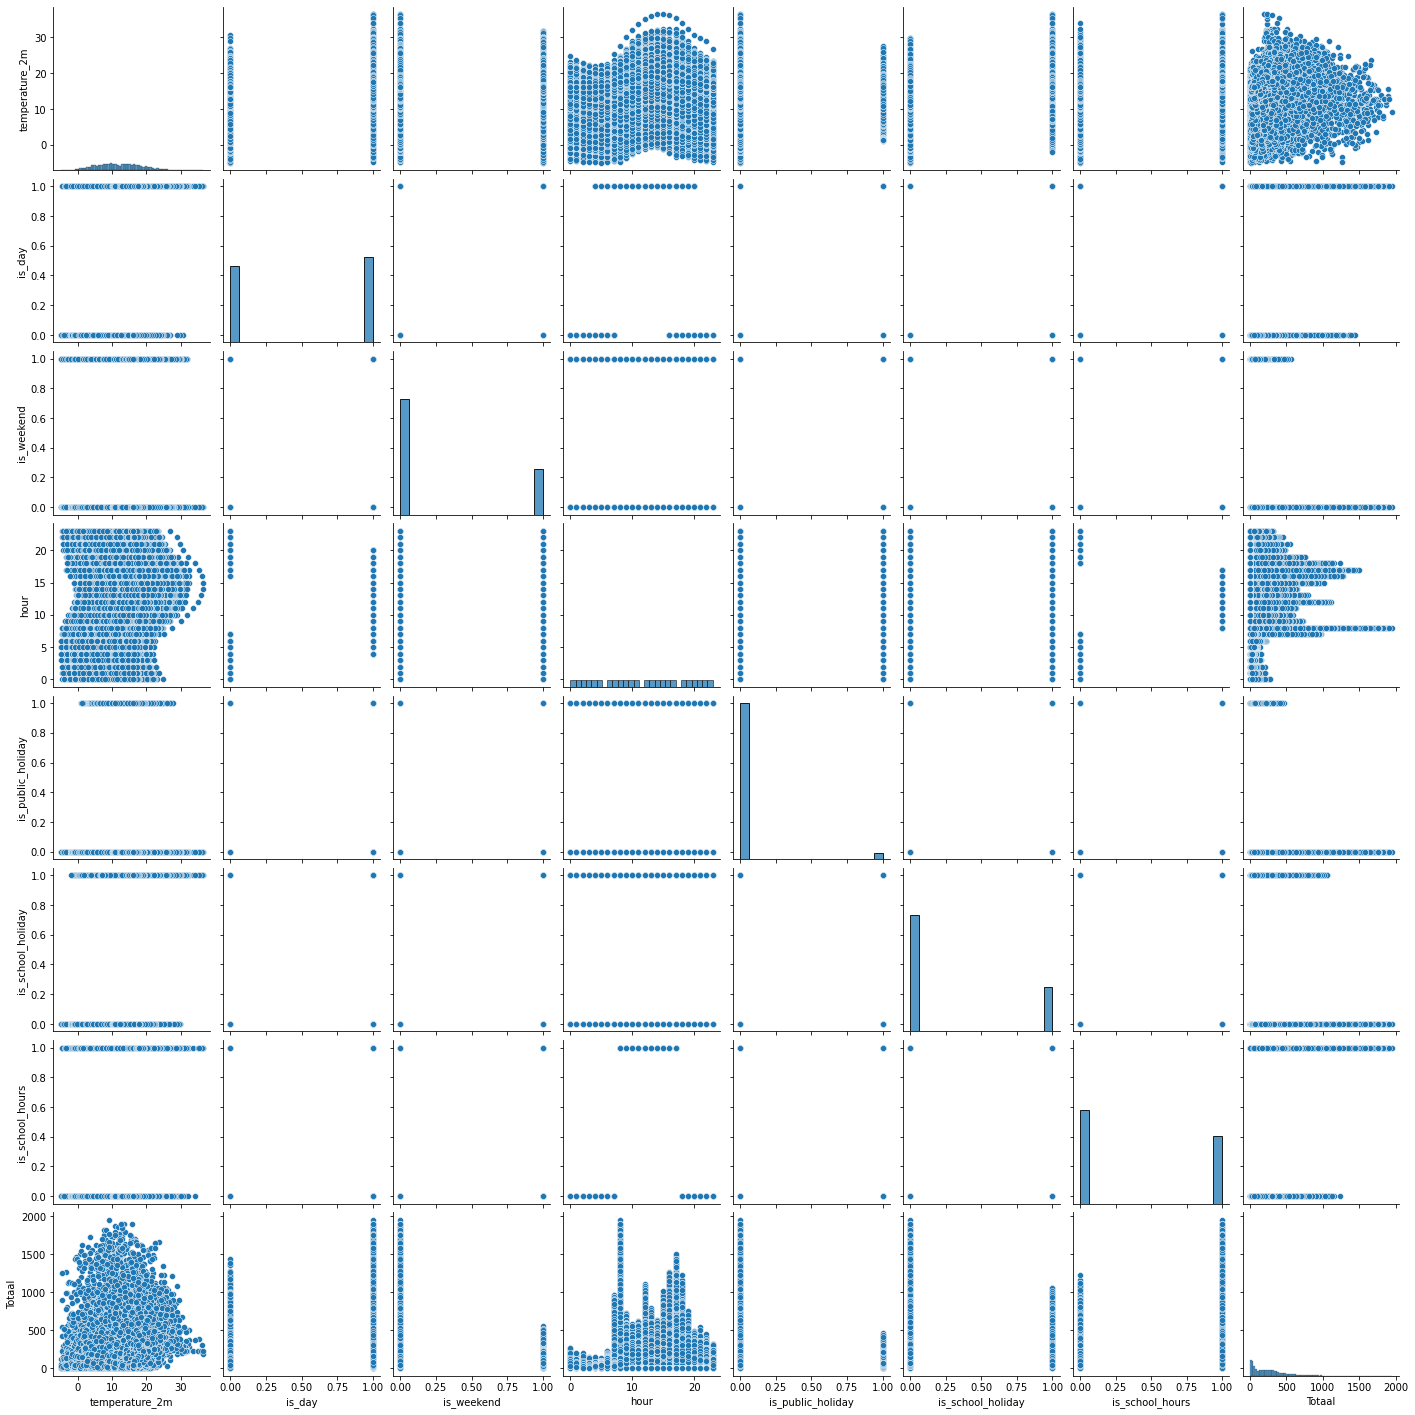

In [56]:
import seaborn as sns

plot_features = ['temperature_2m', 'is_day', 'is_weekend', 'hour', 'is_public_holiday', 'is_school_holiday', 'is_school_hours']
sns.pairplot(all_data.loc[:,plot_features + ['Totaal']])

In [57]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

In [58]:
import matplotlib.pyplot as plt

def plot_diff(y_train, y_hat_train, y_test, y_hat_test):
    y_test_reset = y_test.reset_index()
    indices = y_test_reset.index.to_list()
    time = np.divide(indices, max(indices))*31
    logdiff_test = np.log10(y_hat_test - y_test)

    plt.plot(time, logdiff_test, 'bo')
    plt.xlabel('Day')
    plt.ylabel('log10(y_hat_test - y_test)')
    plt.grid(True)
    plt.show()

    y_train_reset = y_train.reset_index()
    indices = y_train_reset.index.to_list()
    time = np.divide(indices, max(indices))*6+1
    logdiff_train = np.log10(y_hat_train - y_train)

    plt.plot(time, logdiff_train, 'bo')
    plt.xlabel('Month')
    plt.ylabel('log10(y_hat_train - y_train)')
    plt.grid(True)
    plt.show()

### Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

LinReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data

y_hat_test = LinReg.predict(X_test) # predict test data

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[LinReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Best features: Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation',
       'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'windspeed_100m',
       'winddirection_10m', 'winddirection_100m', 'windgusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'is_day', 'shortwave_radiation', 'diffuse_radiation',
       'direct_normal_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'direct_radiation_instant',
       'diffuse_radiation_instant', 'direct_normal_irradiance_instant',
       'terrestrial_radiation_instant', 'hour', 'month', 'is_school_hours',
       'is_weekend', 'is_public_holiday', 'is_school_holiday', 'Friday',
       'Monday', 'Saturday', 'Tuesday', 'Totaal_2022'],
      dtype='object')
Train set R²: 0.6771256121137272
Test set R²: 0.19569783370690375


### Poisson Regression

In [104]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

PoiReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), PoissonRegressor()) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data

y_hat_test = PoiReg.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

best_features = X_train.columns[PoiReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Best features: Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation',
       'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'windspeed_100m',
       'winddirection_10m', 'winddirection_100m', 'windgusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'is_day', 'shortwave_radiation', 'diffuse_radiation',
       'direct_normal_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'direct_radiation_instant',
       'diffuse_radiation_instant', 'direct_normal_irradiance_instant',
       'terrestrial_radiation_instant', 'hour', 'month', 'is_school_hours',
       'is_weekend', 'is_public_holiday', 'is_school_holiday', 'Friday',
       'Monday', 'Saturday', 'Tuesday', 'Totaal_2022'],
      dtype='object')
Train set R²: 0.6821283361197168
Test set R²: 0.17736713834429985


c:\anaconda\lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


### Negative binomial regression

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

formula = 'Totaal ~ temperature_2m * is_day * hour_sin + is_weekend + is_public_holiday + is_school_holiday + is_school_hours + apparent_temperature + month + Totaal_2022' 

# Create the model
NBReg = smf.glm(formula=formula, data=train_data, family=sm.families.NegativeBinomial())

results = NBReg.fit()

y_hat_train = results.predict(X_train) # predict training data

y_hat_test = results.predict(X_test) # predict test data

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

print(results.summary())


PatsyError: Number of rows mismatch between data argument and Totaal_2022 (20445 versus 744)
    Totaal ~ temperature_2m * is_day * hour_sin + is_weekend + is_public_holiday + is_school_holiday + is_school_hours + apparent_temperature + month + Totaal_2022
                                                                                                                                                        ^^^^^^^^^^^

### Tweedie Regression

In [131]:
from sklearn.linear_model import TweedieRegressor

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

TweReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), TweedieRegressor(alpha = 0.3)) # call an instance of the class LinearRegression

TweReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = TweReg.predict(X_train) # predict training data

y_hat_test = TweReg.predict(X_test) # predict test data

R_train = TweReg.score(X_train, y_train) # Training set R²
R_test = TweReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[TweReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Train set R²: 0.6418267097792667
Test set R²: 0.6942667957687114
Best features: Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation',
       'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'windspeed_100m',
       'winddirection_10m', 'winddirection_100m', 'windgusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'is_day', 'shortwave_radiation', 'diffuse_radiation',
       'direct_normal_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'direct_radiation_instant',
       'diffuse_radiation_instant', 'direct_normal_irradiance_instant',
       'terrestrial_radiation_instant', 'hour', 'month', 'is_school_hours',
       'is_weekend', 'is_public_holiday', 'is_school_holiday', 'Friday',
       'Monday', 'Saturday', 'Tuesday', 'Totaal_2022'],
      dtype='object')


### Ridge Regression

In [132]:
from sklearn.linear_model import Ridge 

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

RidReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data

y_hat_test = RidReg.predict(X_test) # predict test data

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.6769370499877292
Test set R²: 0.20407340340914237


c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


### SVM Regression

In [110]:
from sklearn.svm import SVR

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

SVMReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), SVR()) # call an instance of the class LinearRegression

SVMReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = SVMReg.predict(X_train) # predict training data

y_hat_test = SVMReg.predict(X_test) # predict test data

R_train = SVMReg.score(X_train, y_train) # Training set R²
R_test = SVMReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Train set R²: 0.24804086888231647
Test set R²: 0.3634157744267714


### Gaussion Process Regression

In [111]:
from sklearn.gaussian_process import GaussianProcessRegressor

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

GPReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), GaussianProcessRegressor()) # call an instance of the class LinearRegression

GPReg.fit(X_train, y_train) # fit the model on the training data

y_hat_train = GPReg.predict(X_train) # predict training data

y_hat_test = GPReg.predict(X_test) # predict test data

R_train = GPReg.score(X_train, y_train) # Training set R²
R_test = GPReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Train set R²: 1.0
Test set R²: -1.7007973319984826


### Decision Tree Regression

In [112]:
from sklearn.tree import DecisionTreeRegressor

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

DTReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), DecisionTreeRegressor())

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data

y_hat_test = DTReg.predict(X_test) # predict test data

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Train set R²: 1.0
Test set R²: -0.1297107610009125


### Random Forest Regression

In [142]:
from sklearn.ensemble import RandomForestRegressor

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

RFReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), RandomForestRegressor())

RFReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RFReg.predict(X_train) # predict training data

y_hat_test = RFReg.predict(X_test) # predict test data

R_train = RFReg.score(X_train, y_train) # Training set R²
R_test = RFReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Train set R²: 0.9836206438048494
Test set R²: 0.5085971198697712


### Gradient Boosting Regression

#### sklearn

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

GBReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), GradientBoostingRegressor()).fit(X_train, y_train)

y_hat_train = GBReg.predict(X_train) # predict training data

y_hat_test = GBReg.predict(X_test) # predict test data

R_train = GBReg.score(X_train, y_train) # Training set R²
R_test = GBReg.score(X_test, y_test) # Test set R²

best_features = X_train.columns[TweReg.named_steps['selectfrommodel'].get_support()]

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))
print('Best features: {}'.format(best_features))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Train set R²: 0.8497376555740745
Test set R²: 0.628718237193604
Best features: Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'precipitation',
       'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_high', 'windspeed_10m', 'windspeed_100m',
       'winddirection_10m', 'winddirection_100m', 'windgusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm',
       'soil_temperature_28_to_100cm', 'soil_temperature_100_to_255cm',
       'is_day', 'shortwave_radiation', 'diffuse_radiation',
       'direct_normal_irradiance', 'terrestrial_radiation',
       'shortwave_radiation_instant', 'direct_radiation_instant',
       'diffuse_radiation_instant', 'direct_normal_irradiance_instant',
       'terrestrial_radiation_instant', 'hour', 'month', 'is_school_hours',
       'is_weekend', 'is_public_holiday', 'is_school_holiday', 'Friday',
       'Monday', 'Saturday', 'Tuesday', 'Totaal_2022'],
      dtype='object')


In [144]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

HGBReg = make_pipeline(SelectFromModel(Lasso()), StandardScaler(), HistGradientBoostingRegressor())

HGBReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = HGBReg.predict(X_train) # predict training data

y_hat_test = GBReg.predict(X_test) # predict test data

R_train = HGBReg.score(X_train, y_train) # Training set R²
R_test = HGBReg.score(X_test, y_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

c:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+07, tolerance: 4.391e+04
  model = cd_fast.enet_coordinate_descent(


Train set R²: 0.9736682695920336
Test set R²: 0.6441695736875355


#### XGBoost

In [116]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

X_train = train_data_red.loc[:, all_features]
X_test = test_data.loc[:, all_features]

y_train = train_data_red["Totaal"]
y_test = gtest_data["Totaal"]

def objective(space):
    reg=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    reg.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = reg.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    return {'loss': -accuracy, 'status': STATUS_OK }

space={'max_depth': hp.quniform("max_depth", 1, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



  2%|▏         | 2/100 [00:00<00:35,  2.76trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

  3%|▎         | 3/100 [00:01<00:42,  2.30trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

  5%|▌         | 5/100 [00:01<00:32,  2.95trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

  6%|▌         | 6/100 [00:02<00:25,  3.66trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

  7%|▋         | 7/100 [00:02<00:26,  3.51trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



  8%|▊         | 8/100 [00:02<00:30,  3.05trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 10%|█         | 10/100 [00:03<00:26,  3.43trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 12%|█▏        | 12/100 [00:03<00:18,  4.83trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 14%|█▍        | 14/100 [00:03<00:15,  5.42trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 16%|█▌        | 16/100 [00:04<00:13,  6.06trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 17%|█▋        | 17/100 [00:04<00:16,  4.88trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 19%|█▉        | 19/100 [00:05<00:17,  4.63trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 20%|██        | 20/100 [00:05<00:23,  3.40trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 22%|██▏       | 22/100 [00:06<00:22,  3.48trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 24%|██▍       | 24/100 [00:06<00:22,  3.36trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 25%|██▌       | 25/100 [00:06<00:20,  3.68trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 26%|██▌       | 26/100 [00:07<00:25,  2.92trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 27%|██▋       | 27/100 [00:07<00:23,  3.13trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 28%|██▊       | 28/100 [00:07<00:21,  3.42trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 29%|██▉       | 29/100 [00:08<00:23,  2.96trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 31%|███       | 31/100 [00:08<00:19,  3.62trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 32%|███▏      | 32/100 [00:09<00:23,  2.86trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 34%|███▍      | 34/100 [00:09<00:18,  3.61trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 35%|███▌      | 35/100 [00:10<00:23,  2.80trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 36%|███▌      | 36/100 [00:10<00:24,  2.59trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 37%|███▋      | 37/100 [00:11<00:22,  2.77trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 39%|███▉      | 39/100 [00:11<00:19,  3.20trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 40%|████      | 40/100 [00:12<00:22,  2.72trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 41%|████      | 41/100 [00:12<00:22,  2.66trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 42%|████▏     | 42/100 [00:12<00:22,  2.62trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 44%|████▍     | 44/100 [00:13<00:18,  3.09trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 45%|████▌     | 45/100 [00:13<00:15,  3.60trial/s, best loss: -0.0]


C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklear

 46%|████▌     | 46/100 [00:13<00:13,  4.06trial/s, best loss: -0.0]


C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 47%|████▋     | 47/100 [00:14<00:18,  2.94trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 48%|████▊     | 48/100 [00:14<00:21,  2.40trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 49%|████▉     | 49/100 [00:15<00:19,  2.58trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 51%|█████     | 51/100 [00:15<00:16,  2.90trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 52%|█████▏    | 52/100 [00:16<00:14,  3.38trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 53%|█████▎    | 53/100 [00:16<00:15,  2.96trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 55%|█████▌    | 55/100 [00:17<00:15,  2.85trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 56%|█████▌    | 56/100 [00:17<00:13,  3.21trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 57%|█████▋    | 57/100 [00:17<00:12,  3.56trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 58/100 [00:17<00:10,  3.92trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 59%|█████▉    | 59/100 [00:18<00:14,  2.76trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 61%|██████    | 61/100 [00:19<00:12,  3.01trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 62%|██████▏   | 62/100 [00:19<00:12,  3.16trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 63%|██████▎   | 63/100 [00:19<00:10,  3.58trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 64%|██████▍   | 64/100 [00:19<00:09,  3.97trial/s, best loss: -0.0]


C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklear

 65%|██████▌   | 65/100 [00:20<00:11,  3.07trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 66%|██████▌   | 66/100 [00:21<00:15,  2.16trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 67%|██████▋   | 67/100 [00:21<00:15,  2.15trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 68%|██████▊   | 68/100 [00:22<00:16,  1.97trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 69%|██████▉   | 69/100 [00:22<00:16,  1.90trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 70%|███████   | 70/100 [00:23<00:15,  2.00trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 72%|███████▏  | 72/100 [00:23<00:12,  2.31trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 73%|███████▎  | 73/100 [00:24<00:10,  2.47trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 74%|███████▍  | 74/100 [00:24<00:09,  2.67trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 75%|███████▌  | 75/100 [00:24<00:08,  2.91trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 76%|███████▌  | 76/100 [00:25<00:11,  2.12trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 77%|███████▋  | 77/100 [00:26<00:11,  1.97trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 78%|███████▊  | 78/100 [00:27<00:14,  1.57trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 80%|████████  | 80/100 [00:28<00:10,  1.89trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 81%|████████  | 81/100 [00:28<00:08,  2.20trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 82/100 [00:28<00:07,  2.49trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 83%|████████▎ | 83/100 [00:29<00:07,  2.22trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 84%|████████▍ | 84/100 [00:30<00:09,  1.78trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 85%|████████▌ | 85/100 [00:30<00:08,  1.82trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 87%|████████▋ | 87/100 [00:31<00:05,  2.18trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 88%|████████▊ | 88/100 [00:31<00:04,  2.46trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 89%|████████▉ | 89/100 [00:31<00:04,  2.72trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 90%|█████████ | 90/100 [00:32<00:03,  2.97trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 91%|█████████ | 91/100 [00:32<00:02,  3.05trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn

 92%|█████████▏| 92/100 [00:33<00:03,  2.42trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 93%|█████████▎| 93/100 [00:33<00:03,  2.15trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [00:34<00:03,  1.85trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 95%|█████████▌| 95/100 [00:34<00:02,  1.95trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [00:35<00:02,  1.95trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 97%|█████████▋| 97/100 [00:35<00:01,  1.98trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [00:36<00:01,  1.87trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py

 99%|█████████▉| 99/100 [00:36<00:00,  2.06trial/s, best loss: -0.0]

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:160: UserWarning: [01:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\metric\auc.cc:320: Dataset is empty, or contains only positive or negative samples.
  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [00:37<00:00,  2.69trial/s, best loss: -0.0]


The best hyperparameters are :  

{'colsample_bytree': 0.7415418445506734, 'gamma': 4.872912417314612, 'max_depth': 18.0, 'min_child_weight': 5.0, 'reg_alpha': 70.0, 'reg_lambda': 0.9773508370657179}
Train set R²: 0.9872497834544635
Test set R²: 0.45424327143674426


C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


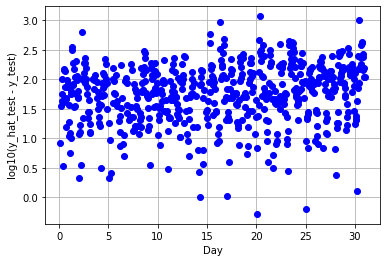

C:\Users\Luca Visser\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


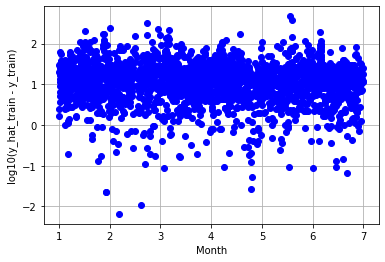

In [117]:
import xgboost as xgb
from sklearn.metrics import r2_score

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

best_hyperparams["max_depth"] = int(best_hyperparams["max_depth"])

dmatrix = xgb.DMatrix(X_train, label=y_train)

XGBReg =  xgb.train(best_hyperparams, dmatrix)

y_hat_train = XGBReg.predict(xgb.DMatrix(X_train))
y_hat_test = XGBReg.predict(xgb.DMatrix(X_test))

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

plot_diff(y_train, y_hat_train, y_test, y_hat_test)

## Submission

### Prediction

In [274]:
X = test_data.loc[:, features]

LinReg_predictions = LinReg.predict(X)
PoiReg_predictions = PoiReg.predict(X)
GBReg_predictions = GBReg.predict(X)
XGBReg_predictions = XGBReg.predict(xgb.DMatrix(X))

predictions = {"LinReg": LinReg_predictions, 
               "PoiReg": PoiReg_predictions,
               "GBReg": GBReg_predictions,
               "XGBReg": XGBReg_predictions}

### Save results

In [275]:
# format predictions with Ids into dataframe and save to csv.

for model in predictions:
    file = pd.DataFrame([test_data["Id"], predictions[model]]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/" + model + ".csv", index = False)